In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, t

In [2]:
import os
os.chdir('d:/future/Index_Future_Prediction')

import yaml
with open('config.yaml', 'r') as file:
    token = yaml.safe_load(file)['token']

import tushare as ts
pro = ts.pro_api(token)

In [3]:
future_list = pro.fut_basic(fut_type = 2)
future_list

,ts_code,symbol,exchange,name,fut_code,multiplier,trade_unit,per_unit,quote_unit,quote_unit_desc,d_mode_desc,list_date,delist_date,d_month,last_ddate
0,CFE_LL161MSF.WI,CFE_LL161MSF,None,上证50当月合成期货,HO.CFE,None,None,None,None,None,None,None,None,None,None
1,CFE_LL161QSF.WI,CFE_LL161QSF,None,上证50当季合成期货,HO.CFE,None,None,None,None,None,None,None,None,None,None
2,CFE_LL162MSF.WI,CFE_LL162MSF,None,上证50下月合成期货,HO.CFE,None,None,None,None,None,None,None,None,None,None
3,CFE_LL162QSF.WI,CFE_LL162QSF,None,上证50下季合成期货,HO.CFE,None,None,None,None,None,None,None,None,None,None
4,CFE_LL163MSF.WI,CFE_LL163MSF,None,上证50下下月合成期货,HO.CFE,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,IML3.CFX,IML3,CFFEX,中证1000期货下季连续,IM,None,None,None,None,None,None,None,None,None,None
207,TLL.CFX,TLL,CFFEX,30年期国债期货当季连续,TL,None,None,None,None,None,None,None,None,None,None
208,TLL1.CFX,TLL1,CFFEX,30年期国债期货下季连续,TL,None,None,None,None,None,None,None,None,None,None
209,TLL2.CFX,TLL2,CFFEX,30年期国债期货隔季连续,TL,None,None,None,None,None,None,None,None,None,None


In [4]:
data = pro.fut_daily(ts_code = 'TL.CFX')
data

,ts_code,trade_date,pre_close,pre_settle,open,high,low,close,settle,change1,change2,vol,amount,oi,oi_chg
0,TL.CFX,20251009,107.845,107.885,107.855,108.095,107.810,108.045,108.050,0.160,0.165,73515.0,7.940384e+06,223544.0,None
1,TL.CFX,20250930,107.660,107.660,107.645,108.000,107.625,107.845,107.885,0.185,0.225,91682.0,9.884427e+06,221887.0,None
2,TL.CFX,20250929,107.680,107.670,107.705,107.790,107.615,107.660,107.660,-0.010,-0.010,85459.0,9.202599e+06,220976.0,None
3,TL.CFX,20250926,107.610,107.540,107.655,107.730,107.610,107.680,107.670,0.140,0.130,81745.0,8.801374e+06,219928.0,None
4,TL.CFX,20250925,107.650,107.620,107.600,107.645,107.345,107.610,107.540,-0.010,-0.080,131434.0,1.412430e+07,217758.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,TL.CFX,20170719,95.135,95.115,95.200,95.280,95.070,95.100,95.125,-0.015,0.010,40537.0,3.858416e+06,48492.0,None
1996,TL.CFX,20170718,95.410,95.395,95.300,95.300,95.030,95.135,95.115,-0.260,-0.280,42281.0,4.023408e+06,48931.0,None
1997,TL.CFX,20170717,95.395,95.340,95.440,95.660,95.350,95.410,95.395,0.070,0.055,45520.0,4.347263e+06,50138.0,None
1998,TL.CFX,20170714,95.405,95.365,95.350,95.400,95.250,95.395,95.340,0.030,-0.025,30873.0,2.943067e+06,50854.0,None


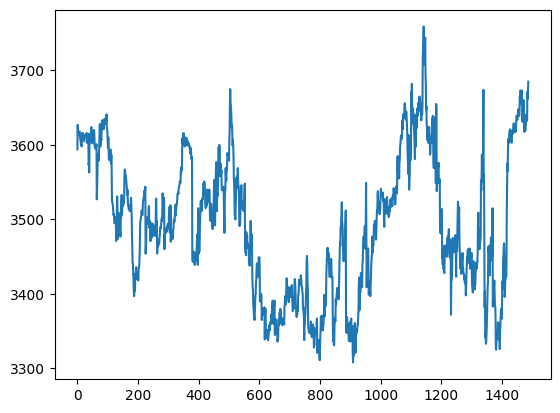

In [4]:
import matplotlib.pyplot as plt
plt.plot(data['close'])
plt.show()

In [5]:
assets_list = []
assets_names = []
for i in future_list.index:
    assets_code = future_list.loc[i, 'ts_code']
    assets_name = future_list.loc[i, 'name']

    if "主力" not in assets_name:
        continue

    data = pro.fut_daily(ts_code = assets_code)
    data_head = data.head(100)

    if len(data) < 1000:
        continue
    if data_head['oi'].mean() < 50000:
        continue
    assets_list.append(assets_code)
    assets_names.append(assets_name)

len(assets_list)

48

In [6]:
assets_names

['不锈钢主力',
 'LPG主力',
 '红枣主力',
 '苯乙烯主力',
 '尿素主力',
 'PTA主力',
 '沪铝主力',
 '沪铜主力',
 '玉米淀粉主力',
 '沪锌主力',
 '玉米主力',
 '白银主力',
 '螺纹钢主力',
 'PVC主力',
 '豆粕主力',
 '豆一主力',
 '菜油主力',
 '聚丙烯主力',
 '甲醇主力',
 '沪镍主力',
 '棕榈油主力',
 '豆二主力',
 '白糖主力',
 '鸡蛋主力',
 '焦煤主力',
 '燃油主力',
 '黄金主力',
 '塑料主力',
 '铁矿石主力',
 '豆油主力',
 '硅铁主力',
 '橡胶主力',
 '热轧卷板主力',
 '锰硅主力',
 '玻璃主力',
 '棉花主力',
 '菜粕主力',
 '沥青主力',
 '短纤主力',
 '苹果主力',
 '纸浆主力',
 '低硫燃料油主力',
 '乙二醇主力',
 '生猪主力',
 '菜油主力',
 '强麦主力',
 '纯碱主力',
 '花生主力']

In [7]:
assets_list = ['SS.SHF',
 'PG.DCE',
 'CJ.ZCE',
 'EB.DCE',
 'UR.ZCE',
 'TA.ZCE',
 'AL.SHF',
 'CU.SHF',
 'CS.DCE',
 'ZN.SHF',
 'C.DCE',
 'AG.SHF',
 'RB.SHF',
 'V.DCE',
 'M.DCE',
 'A.DCE',
 'OI.ZCE',
 'PP.DCE',
 'MA.ZCE',
 'NI.SHF',
 'P.DCE',
 'B.DCE',
 'SR.ZCE',
 'JD.DCE',
 'JM.DCE',
 'FU.SHF',
 'AU.SHF',
 'L.DCE',
 'I.DCE',
 'Y.DCE',
 'SF.ZCE',
 'RU.SHF',
 'HC.SHF',
 'SM.ZCE',
 'FG.ZCE',
 'CF.ZCE',
 'RM.ZCE',
 'BU.SHF',
 'PF.ZCE',
 'AP.ZCE',
 'SP.SHF',
 'LU.INE',
 'EG.DCE',
 'LH.DCE',
 'RO.ZCE',
 'WS.ZCE',
 'SA.ZCE',
 'PK.ZCE']

In [8]:
assets_list = ['IH.CFX', 'IF.CFX', 'IC.CFX', 'AU.SHF', 'JM.DCE','RB.SHF','HC.SHF', 'I.DCE', 'M.DCE', 'CF.ZCE',]

In [9]:
assets_list = ['IH.CFX', 'IF.CFX', 'IC.CFX', 'AU.SHF', 'JM.DCE','RB.SHF','HC.SHF', 'I.DCE', 'M.DCE', 'CF.ZCE',]

In [10]:
data = pro.fut_daily(ts_code = 'IH.CFX', start_date = '20160101', end_date = '20200101')
data.sort_values(by = 'trade_date', inplace = True)
data['diff'] = data['close'] - data['close'].shift(10)
data

,ts_code,trade_date,pre_close,pre_settle,open,high,low,close,settle,change1,change2,vol,amount,oi,oi_chg,diff
974,IH.CFX,20160104,2388.8,2403.6,2374.0,2388.4,2240.2,2254.0,2291.2,-149.6,-112.4,4786.0,334657.416,10650.0,None,NaN
973,IH.CFX,20160105,2254.0,2291.2,2250.2,2299.0,2211.8,2261.0,2254.2,-30.2,-37.0,7003.0,475842.732,11654.0,None,NaN
972,IH.CFX,20160106,2261.0,2254.2,2260.0,2303.4,2256.2,2288.0,2290.4,33.8,36.2,6342.0,433303.854,11130.0,None,NaN
971,IH.CFX,20160107,2288.0,2290.4,2268.0,2268.2,2140.0,2145.8,2220.8,-144.6,-69.6,1951.0,129990.540,10507.0,None,NaN
970,IH.CFX,20160108,2145.8,2220.8,2200.0,2244.8,2135.8,2194.2,2207.0,-26.6,-13.8,7394.0,487736.742,11371.0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,IH.CFX,20191225,3003.0,3004.4,3001.6,3002.0,2982.6,2996.8,2989.6,-7.6,-14.8,18595.0,1670048.238,27489.0,None,46.4
3,IH.CFX,20191226,2996.8,2989.6,2997.8,3022.6,2994.4,3017.8,3015.0,28.2,25.4,21835.0,1971234.180,28052.0,None,78.8
2,IH.CFX,20191227,3017.8,3015.0,3020.2,3060.0,3020.2,3027.6,3031.8,12.6,16.8,29000.0,2646357.612,29979.0,None,21.4
1,IH.CFX,20191230,3027.6,3031.8,3026.6,3078.0,3017.8,3067.8,3066.8,36.0,35.0,29123.0,2665393.578,29672.0,None,68.2


In [11]:
pred_len = 5
threshold_ratio = 0.26

In [12]:
for asset_code in assets_list:

    data_1 = pro.fut_daily(ts_code = asset_code, start_date = '20160101', end_date = '20200101', fields = 'ts_code,trade_date,pre_close,pre_settle,open,high,low,close,settle,vol, amount,oi')
    data_2 = pro.fut_daily(ts_code = asset_code, start_date = '20180101', fields = 'ts_code,trade_date,pre_close,pre_settle,open,high,low,close,settle,vol, amount,oi')
    data = pd.concat([data_1, data_2], ignore_index = True)

    data['oi_chg'] = 1
    data.dropna(inplace=True)
    data.sort_values(by = 'trade_date', inplace = True)
    

    # 日内相对价格
    data['inday_chg_open'] = np.log(data['open'] / data['pre_close']) * 100 
    data['inday_chg_high'] = np.log(data['high'] / data['pre_close']) * 100 
    data['inday_chg_low'] = np.log(data['low'] / data['pre_close']) * 100 
    data['inday_chg_close'] = np.log(data['close'] / data['pre_close']) * 100
    data['inday_chg_amplitude'] = np.log(data['high'] / data['low']) * 100

    # 辅助变量 加强长距离信息传递
    data['ma_10'] = np.log(data['close'] / data['close'].rolling(window = 10).mean()) / 10**0.5 * 100
    data['ma_26'] = np.log(data['close'] / data['close'].rolling(window = 26).mean()) / 26**0.5 * 100
    data['ma_45'] = np.log(data['close'] / data['close'].rolling(window = 45).mean()) / 45**0.5 * 100
    data['ma_90'] = np.log(data['close'] / data['close'].rolling(window = 90).mean()) / 90**0.5 * 100
    data['ma_vol'] = np.log(data['vol'] / data['vol'].rolling(window = 90).mean())


    # 预测目标
    data['label_return'] = data['inday_chg_close'].rolling(window = pred_len).sum().shift(-pred_len) # 标准化为对数百分比（不含百分号），可以直接相加
    data['return_std_hist'] = data['label_return'].rolling(window = 250).std() # 过去一年的预测目标的标准差

    # Garman-Klass 方差计算估测目标的真实方差
    data['label_garman_klass_variance'] = (0.5 * (np.log(data['high']) - np.log(data['low'])) ** 2 - 0.386 * (np.log(data['close']) - np.log(data['open'])) ** 2)
    # 计算10日移动方差
    data['label_garman_klass_variance_pred'] = data['label_garman_klass_variance'].rolling(window = pred_len).sum().shift(-pred_len)
    # 计算10日移动标准差
    data['label_garman_klass_std_pred'] = data['label_garman_klass_variance_pred']**0.5
    # 再根据真实标准差均值来矫正预期
    data['label_garman_klass_std_hist'] = data['label_garman_klass_std_pred'].rolling(window = 250).mean()


    # 估计的标准差
    data['label_std'] = data['label_garman_klass_std_pred'] / data['label_garman_klass_std_hist'] * data['return_std_hist']
    print(data['label_std'].mean(), data['return_std_hist'].mean())
    # 振幅估计方法（已废弃）
    # data['average_log_amplitude'] = data['log_amplitude'].rolling(window = pred_len).mean().shift(-pred_len)
    # data['label_pred_high'] = data['high'].rolling(window = pred_len).max().shift(-pred_len)
    # data['label_pred_low'] = data['low'].rolling(window = pred_len).min().shift(-pred_len)
    # data['label_amplitude'] = data['label_pred_high'] - data['label_pred_low']
    # data['label_amplitude_ma'] = data['label_amplitude'].rolling(window = 250).mean()
    # data['label_std'] = data['label_amplitude'] / data['label_amplitude_ma'] * data['ma_return_std'] # 用预测目标的振幅作为波动率的辅助变量

    # 阈值分位数
    data['upper_bond'] = data['label_return'].rolling(window = 250).quantile(1 - threshold_ratio) # 过去一年的收益下分位数
    data['lower_bond'] = data['label_return'].rolling(window = 250).quantile(threshold_ratio) # 过去一年的收益上分位数
    data['threshold'] = (abs(data['upper_bond']) + abs(data['lower_bond']))/2 # 过去一年的收益的分割阈值

    def down_probability(row):
        return norm.cdf(row['lower_bond'], loc = row['label_return'], scale=row['label_std'])

    def middle_probability(row):
        return norm.cdf(row['upper_bond'], loc = row['label_return'], scale=row['label_std']) - norm.cdf(row['lower_bond'], loc = row['label_return'], scale=row['label_std'])

    def up_probability(row):
        return 1 - norm.cdf(row['upper_bond'], loc = row['label_return'], scale=row['label_std'])
        
    data['down_prob'] = data.apply(down_probability, axis = 1)
    data['middle_prob'] = data.apply(middle_probability, axis = 1)
    data['up_prob'] = data.apply(up_probability, axis = 1)


    data.dropna(inplace=True)
    print(asset_code, len(data))
    data.to_csv(f'{asset_code}.csv')

3.1564714811628836 3.1239199573739356
IH.CFX 2604
3.188077976325228 3.155729541591544
IF.CFX 2604
3.642587776338172 3.6172483498956773
IC.CFX 2604
1.853208606805536 1.8037174547305945
AU.SHF 2604
5.309357034290362 5.430625688165241
JM.DCE 2604
3.631718529647087 3.81677439427272
RB.SHF 2604
3.47172936180212 3.633772122783917
HC.SHF 2604
5.730154889317351 5.909701752586406
I.DCE 2604
3.2126962956047573 3.2784993454324063
M.DCE 2604
2.9862848376130438 3.011456891535402
CF.ZCE 2604


In [13]:
data = pd.read_csv('IC.CFX.csv')
data

,Unnamed: 0,ts_code,trade_date,pre_close,pre_settle,open,high,low,close,settle,...,label_garman_klass_variance_pred,label_garman_klass_std_pred,label_garman_klass_std_hist,label_std,upper_bond,lower_bond,threshold,down_prob,middle_prob,up_prob
0,725,IC.CFX,20170110,6373.8,6368.8,6375.0,6388.6,6343.2,6344.6,6358.4,...,0.001440,0.037948,0.031431,4.822771,2.104474,-1.690117,1.897296,0.720413,0.194380,0.085207
1,724,IC.CFX,20170111,6344.6,6358.4,6339.2,6382.2,6295.0,6297.6,6310.6,...,0.001421,0.037692,0.031289,4.689206,2.104474,-1.690117,1.897296,0.659545,0.229306,0.111149
2,723,IC.CFX,20170112,6297.6,6310.6,6302.4,6321.2,6233.0,6238.4,6256.0,...,0.001424,0.037737,0.031147,4.666667,2.104474,-1.690117,1.897296,0.688161,0.215683,0.096156
3,722,IC.CFX,20170113,6238.4,6256.0,6245.2,6267.4,6170.8,6178.4,6196.8,...,0.001467,0.038296,0.030982,4.629389,2.104474,-1.608854,1.856664,0.495740,0.289917,0.214343
4,721,IC.CFX,20170116,6178.4,6196.8,6171.8,6190.0,5874.8,6011.4,5984.4,...,0.000417,0.020419,0.030734,2.482042,2.104474,-1.578517,1.841496,0.093562,0.471856,0.434581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,984,IC.CFX,20250918,7252.4,7244.2,7238.2,7351.6,7099.2,7171.6,7164.6,...,0.001049,0.032387,0.028853,4.877910,2.434802,-0.881487,1.658145,0.433916,0.262264,0.303819
2600,983,IC.CFX,20250919,7171.6,6960.2,6995.6,7036.8,6924.0,6984.0,6999.0,...,0.001019,0.031915,0.028866,4.803364,2.434802,-0.881487,1.658145,0.319987,0.268119,0.411894
2601,982,IC.CFX,20250922,6984.0,6999.0,7007.0,7019.8,6925.2,7013.2,6995.0,...,0.001183,0.034390,0.028876,5.176671,2.440780,-0.881487,1.661134,0.222351,0.228900,0.548748
2602,981,IC.CFX,20250923,7013.2,6995.0,7033.0,7038.0,6789.0,6940.6,6888.2,...,0.000662,0.025725,0.028853,3.880845,2.453619,-0.881487,1.667553,0.067570,0.195223,0.737207


In [14]:
data.describe()

,Unnamed: 0,trade_date,pre_close,pre_settle,open,high,low,close,settle,vol,...,label_garman_klass_variance_pred,label_garman_klass_std_pred,label_garman_klass_std_hist,label_std,upper_bond,lower_bond,threshold,down_prob,middle_prob,up_prob
count,2604.000000,2.604000e+03,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,...,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000
mean,1484.684332,2.020504e+07,5704.647312,5702.164747,5704.783948,5755.611214,5651.401459,5704.559831,5704.093694,47260.711982,...,0.000812,0.026245,0.026178,3.642588,2.029317,-1.963882,1.996600,0.325691,0.344887,0.329421
std,843.389128,2.463566e+04,749.817467,749.172176,749.399228,747.513128,749.204409,750.206418,749.722682,28904.301272,...,0.000868,0.011106,0.004685,1.863246,0.801878,0.872075,0.751329,0.261401,0.160061,0.255543
min,0.000000,2.017011e+07,4033.200000,4014.600000,3949.000000,4111.400000,3937.800000,4033.200000,4047.800000,2836.000000,...,0.000085,0.009194,0.017364,0.988341,0.840944,-4.193842,1.006922,0.000006,0.001749,0.000029
25%,650.750000,2.018111e+07,5057.800000,5056.400000,5061.800000,5119.900000,5002.200000,5057.800000,5056.400000,17285.500000,...,0.000345,0.018568,0.022457,2.305443,1.382863,-2.805839,1.386509,0.102008,0.231493,0.110151
50%,1555.500000,2.020052e+07,5802.700000,5805.200000,5806.000000,5863.900000,5738.800000,5802.200000,5805.200000,48482.000000,...,0.000562,0.023700,0.025923,3.255579,1.814240,-1.659321,1.749966,0.260908,0.341473,0.274171
75%,2206.250000,2.023012e+07,6270.150000,6263.250000,6262.900000,6309.000000,6215.000000,6269.700000,6264.650000,65871.500000,...,0.000938,0.030623,0.029645,4.484152,2.551911,-1.291224,2.519870,0.506440,0.458468,0.506030
max,2857.000000,2.025092e+07,7596.400000,7604.200000,7608.800000,7680.200000,7534.200000,7596.400000,7604.200000,168648.000000,...,0.010654,0.103220,0.035273,15.602935,4.685099,-0.745814,3.808927,0.995891,0.833600,0.997783


In [15]:
data.describe().loc[['mean', 'std'],['inday_chg_open','inday_chg_high','inday_chg_low','inday_chg_close','inday_chg_amplitude', 'ma_10','ma_26','ma_45','ma_90','ma_vol',]]

,inday_chg_open,inday_chg_high,inday_chg_low,inday_chg_close,inday_chg_amplitude,ma_10,ma_26,ma_45,ma_90,ma_vol
mean,0.003324,0.910679,-0.953162,-0.002289,1.863841,0.001843,0.003872,0.001692,-0.007520,0.004722
std,0.647985,1.061981,1.145859,1.475378,1.060777,0.681928,0.693700,0.697794,0.667796,0.292526


In [16]:
data.describe().loc[['mean', 'std'],['label_return','down_prob','middle_prob','up_prob',]]

,label_return,down_prob,middle_prob,up_prob
mean,-0.004429,0.325691,0.344887,0.329421
std,3.826931,0.261401,0.160061,0.255543


In [17]:
import torch
feature = []
label = []
feature_columns = ['inday_chg_open','inday_chg_high','inday_chg_low','inday_chg_close','inday_chg_amplitude', 'ma_10','ma_26','ma_45','ma_90','ma_vol',]
label_columns = ['label_return','down_prob','middle_prob','up_prob',]

for asset_code in assets_list:
    data = pd.read_csv(f'{asset_code}.csv')
    feature.append(torch.tensor(data[feature_columns].values, dtype = torch.float32, device = 'cuda:0'))
    label.append(torch.tensor(data[label_columns].values, dtype = torch.float32, device = 'cuda:0'))

feature = torch.stack(feature, dim = 1)
label = torch.stack(label, dim = 1)

feature.shape, label.shape

(torch.Size([2604, 10, 10]), torch.Size([2604, 10, 4]))

In [18]:
seq_len = 30
feature = feature.unfold(dimension = 0, size = seq_len, step = 1).permute(0,1,3,2)
label = label[seq_len-1:]

feature.shape, label.shape

(torch.Size([2575, 10, 30, 10]), torch.Size([2575, 10, 4]))